In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nba_data = pd.read_csv('all_seasons.csv')

In [4]:
nimp = [
    'player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight',
    'gp', 'pts', 'reb', 'ast', 'season'
]
nclear = nba_data[nimp].copy()  

nclear.loc[:, 'total_points'] = nclear['pts'] * nclear['gp'] 
nclear.loc[:, 'ppg'] = nclear['pts']

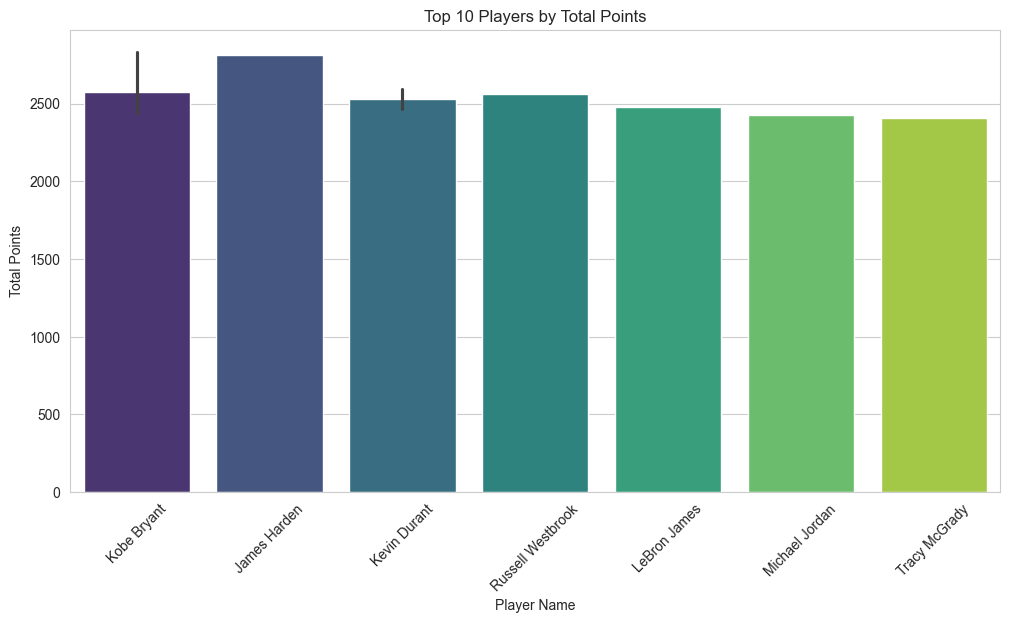

In [5]:
# Top 10 players by total points
top_scorers = nclear.sort_values(by='total_points', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_scorers,
    x='player_name',
    y='total_points',
    hue='player_name',
    palette='viridis',
    dodge=False
)
plt.legend([], [], frameon=False)  
plt.xticks(rotation=45)
plt.title("Top 10 Players by Total Points")
plt.ylabel("Total Points")
plt.xlabel("Player Name")
plt.show()

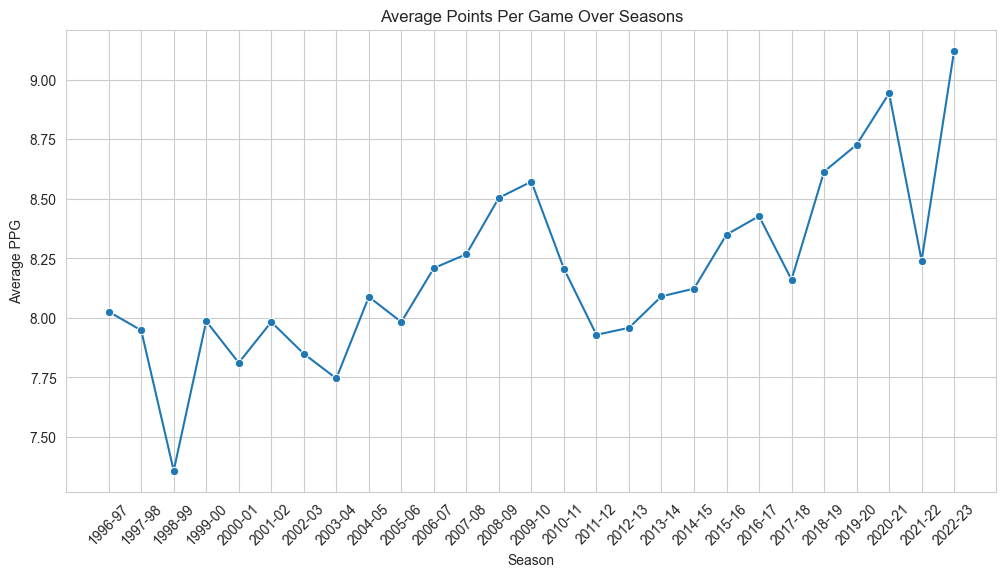

In [6]:
season_avg_points = nclear.groupby('season')['ppg'].mean().reset_index()

# Plot average points per season
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_avg_points, x='season', y='ppg', marker='o')
plt.xticks(rotation=45)
plt.title("Average Points Per Game Over Seasons")
plt.ylabel("Average PPG")
plt.xlabel("Season")
plt.show()


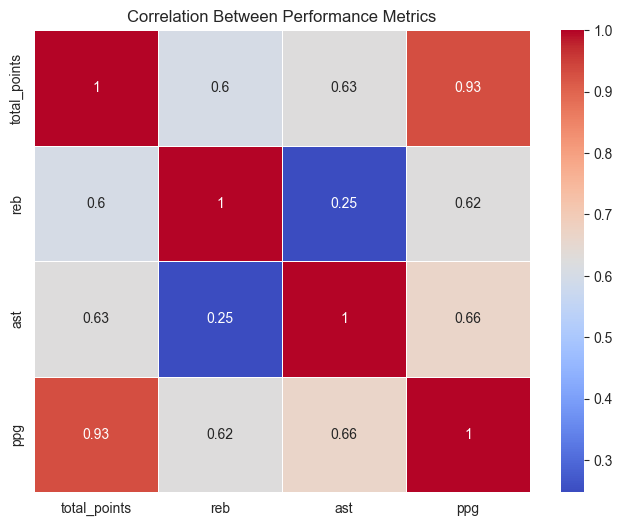

In [7]:
performance_metrics = nclear[['total_points', 'reb', 'ast', 'ppg']]
correlation_matrix = performance_metrics.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Performance Metrics")
plt.show()

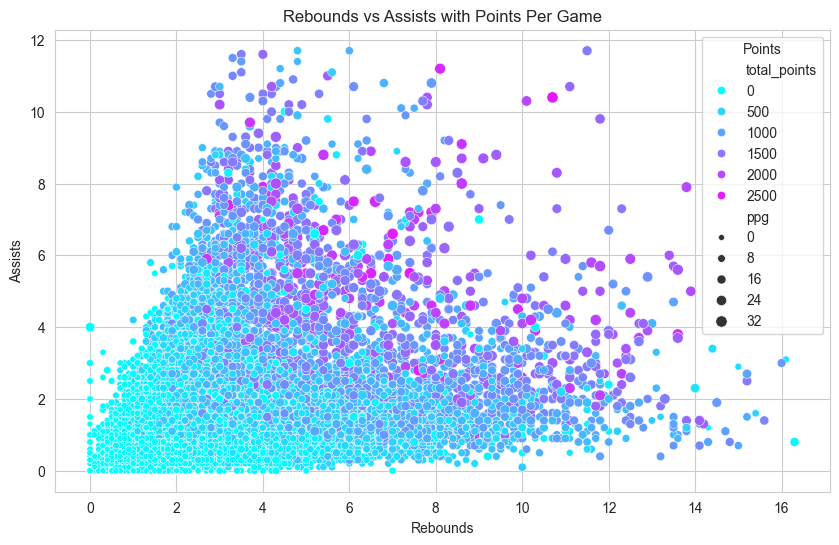

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nclear, x='reb', y='ast', size='ppg', hue='total_points', palette='cool')
plt.title("Rebounds vs Assists with Points Per Game")
plt.xlabel("Rebounds")
plt.ylabel("Assists")
plt.legend(title="Points")
plt.show()


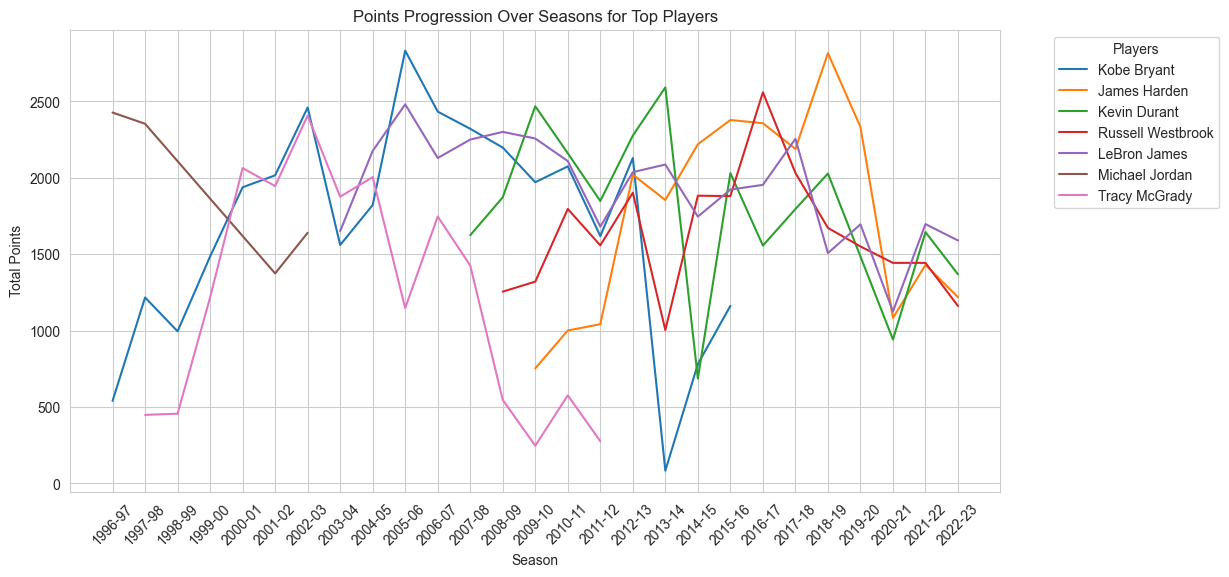

In [9]:
# Get data for top players
top_player_names = top_scorers['player_name'].unique()
top_players_data = nclear[nclear['player_name'].isin(top_player_names)]

plt.figure(figsize=(12, 6))
for player in top_player_names:
    player_data = top_players_data[top_players_data['player_name'] == player]
    plt.plot(player_data['season'], player_data['total_points'], label=player)

plt.title("Points Progression Over Seasons for Top Players")
plt.xlabel("Season")
plt.ylabel("Total Points")
plt.legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


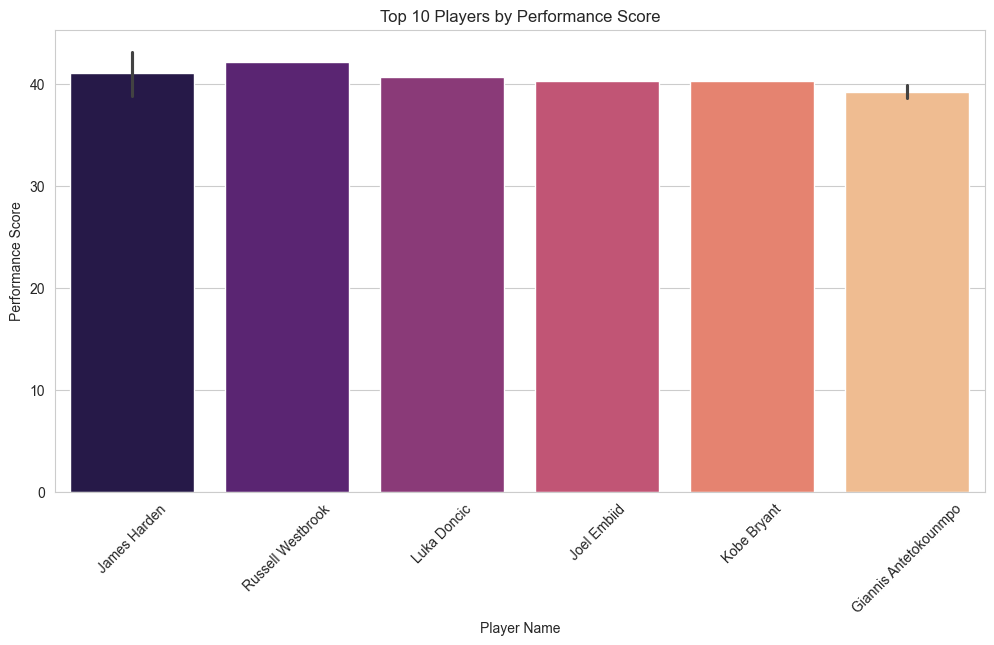

In [10]:
nclear['performance_score'] = nclear['ppg'] + (nclear['reb'] * 0.5) + (nclear['ast'] * 0.5)

top_performers = nclear.sort_values(by='performance_score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_performers, x='player_name', y='performance_score', palette='magma', hue='player_name')
plt.xticks(rotation=45)
plt.title("Top 10 Players by Performance Score")
plt.ylabel("Performance Score")
plt.xlabel("Player Name")
plt.show()


Mean Squared Error: 11.947885967282053
R-squared: 0.6738742785430583


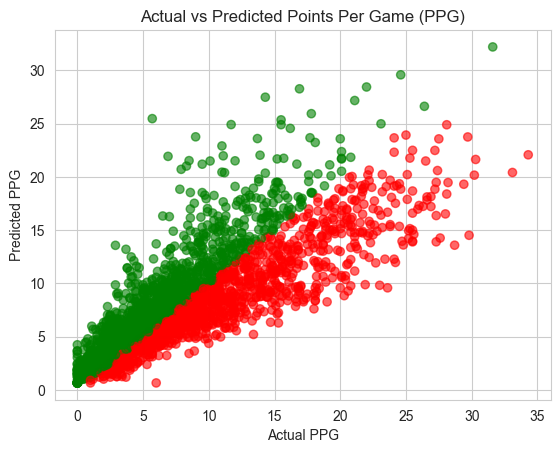

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = nclear[['reb', 'ast']]
y = nclear['ppg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

colors = np.where(y_pred > y_test, 'g', 'r') 

plt.figure()
plt.scatter(y_test, y_pred, c=colors, alpha=0.6)
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')
plt.title('Actual vs Predicted Points Per Game (PPG)')
plt.show()
